## Ejemplo 1: Microlentes

- ¿Qué tamaño angular tendría un anillo de Einstein proveniente de próxima centauri si un planeta "vagabundo" con $M=10M_{Jup}$ pasara justo a la mitad de la distancia?

    $$ \theta_{E} = 0.902\,mas\left(\dfrac{M}{M_{\odot}}\right)^{1/2}\left(\dfrac{D_{d}}{10kpc}\right)^{-1/2}\left(1-\dfrac{D_{d}}{D_{s}}\right)^{1/2}$$

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.constants as cons

In [4]:
dist_pc = 1.3 * u.pc
M_pv = 10*u.M_jup

In [5]:
Einstein = 0.902*u.mas*(M_pv.to(u.kg)/cons.M_sun)**(1/2)*(dist_pc.to(u.kpc)/(10*10*u.kpc))**(-1/2)*(1-0.1)**(1/2)
Einstein

<Quantity 23.18811895 mas>

In [7]:
Einstein2 = 0.902*u.mas*(M_pv.to(u.kg)/cons.M_sun)**(1/2)*(dist_pc.to(u.kpc)/(2*10*u.kpc))**(-1/2)*(1-0.5)**(1/2)
Einstein2

<Quantity 7.72937298 mas>

- El libro de Planetary Science (Lissauer $\&$ Pater) tiene una ecuación que dice que un anillo de Einstein tiene un tamaño dado por:

$$R_{E} = \sqrt{\dfrac{4GM_{L}r_{\Delta L}}{c^{2}}}\left(1 - \dfrac{r_{\Delta L}}{r_{\Delta s}}\right)^{1/2} $$ 

- Calcule $R_{E}$ y encuentre cual es la relación que tiene con $\theta_{E}$.

In [9]:
R_E = np.sqrt(4*cons.G*M_pv.to(u.kg)*dist_pc.to(u.m)*0.5/cons.c**2)*np.sqrt(1-0.5)
R_E.to(u.pc)

<Quantity 2.43691803e-08 pc>

In [10]:
((R_E*2/dist_pc.to(u.m))*u.rad).to(u.mas)

<Quantity 7.73308346 mas>

- Suponga que el planeta "vagabundo" se mueve a una velocidad de 220 km/s, calcule el tiempo de Einstein.

   $$ t_{E} = 0.214\,yr\left(\dfrac{M}{M_{\odot}}\right)^{1/2}\left(\dfrac{D_{d}}{10kpc}\right)^{1/2}\left(1-\dfrac{D_{d}}{D_{s}}\right)^{1/2}\left(\dfrac{\upsilon}{200\,km/s}\right)^{-1}$$

In [12]:
v_v = 220 * u.km/u.s

In [13]:
t_E = 0.214*u.yr*(M_pv.to(u.kg)/cons.M_sun)**(1/2)*(dist_pc.to(u.kpc)/(2*10*u.kpc))**(1/2)*(1-0.5)**(1/2)*(200*u.km/u.s/v_v)
t_E.to(u.min)

<Quantity 56.99344235 min>

In [14]:
(33.9/70)**2

0.23453265306122448

## Ejemplo 2: Microlentes 2

- Usando la figura 2.36 del libro y los datos de la referencia en  https://ui.adsabs.harvard.edu/abs/1993Natur.365..621A/abstract, reproducir las curvas representadas en la figura 2.35.

In [35]:
t = np.linspace(390,470,200) * u.d
t_max = 433.55 * u.d
t_E = 33.9 * u.d
p = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
S_0 = 1.0

<IPython.core.display.Javascript object>


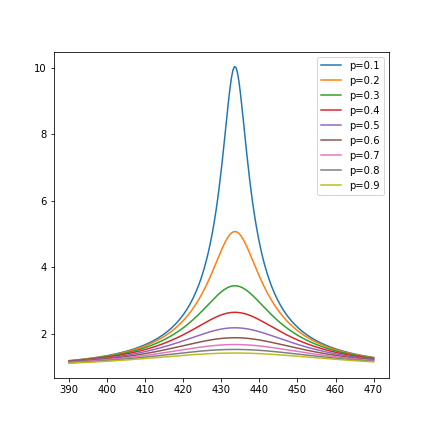

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(len(p)):
    y = np.sqrt(p[i]**2 + ((t-t_max)/t_E)**2)
    mu = (y**2  + 2)/(y * np.sqrt(y**2 + 4))
    S = S_0 * mu
    ax.plot(t, S, label='p='+str(p[i]))

ax.legend()  

## Problema p6:

- Usando la gráfica realizada en el ejemplo anterior y la magnificación máxima, encuentre el valor de $p$ para la primera detección de un microlente gravitacional.

Para poder encontrar el valor de $p$ para la primera detección de un microlente gravitacional nos vamos a referirir a la publicación realizada por $'\textbf{The MACHO collaboration}$ que encontraron en LMC.

Referencia: https://ui.adsabs.harvard.edu/abs/1993Natur.365..621A/abstract

En dicha publicación se encontron que $\mu_{max} = 6.86$ y esto solamente ocurre cuando $y_{min} = p$. Por lo tanto se tiene que cuando $\mu(p) = \mu_{max}$ y recordando que:

$$ \mu = \dfrac{y^2 + 2}{y\sqrt{y^2+4}} $$

Sustituyendo tendriamos:

$$\mu_{max} = \dfrac{p^2 + 2}{p\sqrt{p^2+4}} $$

In [19]:
from sympy import *

In [20]:
p = symbols('p')

In [21]:
solve((p**2+2)/(p*(p**2+4)**(1/2)) - 6.86, p)

[0.146950402440989, 2.00539133856152*I]

Obtenemos que el valor de $p$ para la primera detección de microlente gravitacional es:

$$ p = 0.1469$$

In [29]:
p = 0.1469

Ahora vamos a realizar la grafica:

In [30]:
y = np.sqrt(p**2 + ((t-t_max)/t_E)**2)
y

<Quantity [1.29303244, 1.28125123, 1.26947145, 1.25769316, 1.2459164 ,
           1.2341412 , 1.22236762, 1.2105957 , 1.19882549, 1.18705705,
           1.17529041, 1.16352565, 1.15176281, 1.14000197, 1.12824316,
           1.11648648, 1.10473197, 1.09297971, 1.08122978, 1.06948225,
           1.0577372 , 1.04599472, 1.03425488, 1.0225178 , 1.01078355,
           0.99905223, 0.98732397, 0.97559885, 0.96387701, 0.95215855,
           0.94044361, 0.92873232, 0.91702482, 0.90532126, 0.89362178,
           0.88192656, 0.87023576, 0.85854957, 0.84686817, 0.83519178,
           0.82352059, 0.81185484, 0.80019476, 0.7885406 , 0.77689263,
           0.76525114, 0.75361642, 0.7419888 , 0.7303686 , 0.71875619,
           0.70715196, 0.69555632, 0.68396969, 0.67239256, 0.6608254 ,
           0.64926877, 0.63772323, 0.62618939, 0.61466792, 0.60315952,
           0.59166495, 0.58018504, 0.56872068, 0.55727282, 0.5458425 ,
           0.53443085, 0.52303909, 0.51166855, 0.50032067, 0.48899704,
      

In [31]:
S = (y**2 + 2)/(y*np.sqrt(y**2 + 4))
S

<Quantity [1.19239397, 1.19662255, 1.20096378, 1.20542126, 1.20999872,
           1.21470003, 1.21952923, 1.22449049, 1.22958816, 1.23482676,
           1.24021099, 1.24574574, 1.2514361 , 1.25728738, 1.26330509,
           1.26949498, 1.27586304, 1.28241553, 1.28915896, 1.29610012,
           1.30324612, 1.31060435, 1.31818256, 1.32598884, 1.33403164,
           1.34231979, 1.35086255, 1.3596696 , 1.36875109, 1.37811764,
           1.38778038, 1.39775099, 1.40804174, 1.41866549, 1.42963575,
           1.44096673, 1.45267337, 1.46477138, 1.47727729, 1.49020854,
           1.5035835 , 1.51742152, 1.53174304, 1.54656965, 1.56192416,
           1.57783066, 1.59431468, 1.61140322, 1.6291249 , 1.64751008,
           1.66659094, 1.68640169, 1.70697866, 1.7283605 , 1.75058836,
           1.77370605, 1.79776031, 1.82280098, 1.84888132, 1.87605823,
           1.9043926 , 1.93394962, 1.96479917, 1.99701617, 2.03068109,
           2.06588037, 2.10270698, 2.14126101, 2.18165025, 2.22399094,
      

<IPython.core.display.Javascript object>


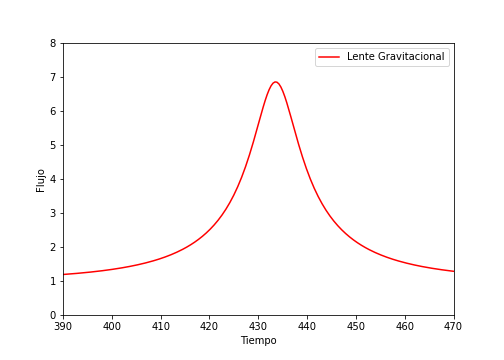

In [33]:
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(t, S, label='Lente Gravitacional', c = 'red', linestyle='-')
ax.set_ylim(0,8)
ax.set_xlim(390,470)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Flujo')
ax.legend()

Vamos a realizar un ajuste para encontrar el mejor valor de P sin usar matematica: